## Abnormal Heartbeat

### Dataset loading

In [14]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff('./datasets/AbnormalHeartbeat/AbnormalHeartbeat.arff')
df_abnormalheart = pd.DataFrame(data[0])

df_abnormalheart.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att3045,att3046,att3047,att3048,att3049,att3050,att3051,att3052,att3053,target
0,0.000031,-0.000092,-0.000031,-0.000214,-0.000275,-0.000061,-0.000183,-0.000153,-0.000092,0.000122,...,-0.000061,-0.000061,-0.000061,-0.000153,0.000000,0.000122,-0.000031,0.000000,0.000000,b'Artifact'
1,-0.000061,0.000092,-0.000122,0.000122,-0.000092,0.000061,-0.000031,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000031,0.000031,0.000000,-0.000031,0.000061,-0.000092,0.000122,b'Artifact'
2,0.000183,-0.000122,-0.000275,-0.000031,-0.000122,0.000031,-0.000153,0.000061,0.000122,0.000092,...,-0.000549,-0.000549,-0.000183,-0.000092,0.000092,-0.000061,-0.000031,-0.000031,0.000000,b'Artifact'
3,-0.002594,-0.006042,-0.006531,-0.005280,-0.005402,-0.006287,-0.007812,-0.008362,-0.005219,-0.001007,...,0.004944,0.007477,0.007233,0.005005,0.009033,0.012970,0.016846,0.020752,0.019806,b'Artifact'
4,0.001617,-0.001068,0.001434,0.005188,0.010376,0.013306,0.016327,0.019501,0.019745,0.017365,...,-0.003967,-0.005035,-0.004791,-0.006104,-0.009064,-0.009796,-0.011322,-0.012634,-0.010834,b'Artifact'


In [15]:
df_abnormalheart = df_abnormalheart.dropna(axis='rows')


In [16]:
# !pip install skimpy
from skimpy import skim

#skim(df_abnormalheart)


In [17]:
abn_bin_values = df_abnormalheart['target'].unique()
print(abn_bin_values)
# df_abnormalheart['target'] = df_abnormalheart['target'].map({
#     abn_bin_values[0]: 0,
#     abn_bin_values[1]: 1,
#     abn_bin_values[2]: 2,
#     abn_bin_values[3]: 3,
#     abn_bin_values[4]: 4
# })

df_abnormalheart['target'] = df_abnormalheart['target'].map(lambda val: val.decode('ascii'))

df_abnormalheart['target'].head()

[b'Artifact' b'ExtraHLS' b'ExtraStole' b'Murmur' b'Normal']


0    Artifact
1    Artifact
2    Artifact
3    Artifact
4    Artifact
Name: target, dtype: object

<AxesSubplot:>

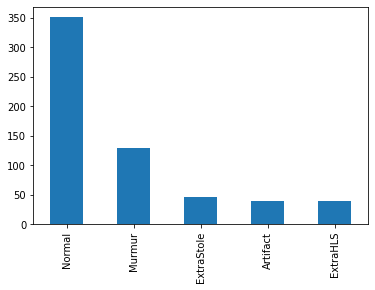

In [18]:
df_abnormalheart['target'].value_counts().plot.bar()


### KNN com Distância Euclidiana sem pré-processamento

#### X and y

In [19]:
abn_X = df_abnormalheart.drop(columns=['target'])
abn_y = df_abnormalheart['target']

abn_X.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att3044,att3045,att3046,att3047,att3048,att3049,att3050,att3051,att3052,att3053
0,0.000031,-0.000092,-0.000031,-0.000214,-0.000275,-0.000061,-0.000183,-0.000153,-0.000092,0.000122,...,0.000000,-0.000061,-0.000061,-0.000061,-0.000153,0.000000,0.000122,-0.000031,0.000000,0.000000
1,-0.000061,0.000092,-0.000122,0.000122,-0.000092,0.000061,-0.000031,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000031,0.000031,0.000000,-0.000031,0.000061,-0.000092,0.000122
2,0.000183,-0.000122,-0.000275,-0.000031,-0.000122,0.000031,-0.000153,0.000061,0.000122,0.000092,...,-0.000702,-0.000549,-0.000549,-0.000183,-0.000092,0.000092,-0.000061,-0.000031,-0.000031,0.000000
3,-0.002594,-0.006042,-0.006531,-0.005280,-0.005402,-0.006287,-0.007812,-0.008362,-0.005219,-0.001007,...,0.002228,0.004944,0.007477,0.007233,0.005005,0.009033,0.012970,0.016846,0.020752,0.019806
4,0.001617,-0.001068,0.001434,0.005188,0.010376,0.013306,0.016327,0.019501,0.019745,0.017365,...,-0.005829,-0.003967,-0.005035,-0.004791,-0.006104,-0.009064,-0.009796,-0.011322,-0.012634,-0.010834


### Classification

[0.42622951 0.45901639 0.37704918 0.36065574 0.37704918 0.45901639
 0.26666667 0.21666667 0.36666667 0.35      ]


/home/jarvis/repositories/MinerandoDados/mineracao-venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


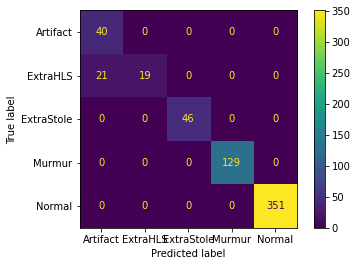

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from os.path import exists
import json

abn_knn_params_file = "./params/abn_knn_grided_cv.json"
abn_knn_scores = []

if not exists(abn_knn_params_file):
    # instantiating classifier
    abn_knn_clf = KNeighborsClassifier()
    # defining testing params
    abn_knn_param = dict(n_neighbors=list(range(1, 31)))
    # training on each param combination
    abn_knn_grided_cv = GridSearchCV(abn_knn_clf, abn_knn_param, cv=10, verbose=10, n_jobs=-1)
    # fitting to best params
    abn_knn_grided_cv.fit(abn_X, abn_y)

    with open("./params/abn_knn_grided_cv.json", "w") as param_f:
        json.dump(abn_knn_grided_cv.best_params_, param_f, indent=4)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)
else:
    with open(abn_knn_params_file, "r") as param_f:
        # instantiating classifier
        abn_knn_clf = KNeighborsClassifier(**json.load(param_f))
        abn_knn_grided_cv = abn_knn_clf.fit(abn_X, abn_y)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)


### KNN com Distância Euclidiana aplicando técnicas básicas de pré-processamento

#### X and y

In [21]:
abn_X = df_abnormalheart.drop(columns=['target'])
abn_y = df_abnormalheart['target']

abn_X.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att3044,att3045,att3046,att3047,att3048,att3049,att3050,att3051,att3052,att3053
0,0.000031,-0.000092,-0.000031,-0.000214,-0.000275,-0.000061,-0.000183,-0.000153,-0.000092,0.000122,...,0.000000,-0.000061,-0.000061,-0.000061,-0.000153,0.000000,0.000122,-0.000031,0.000000,0.000000
1,-0.000061,0.000092,-0.000122,0.000122,-0.000092,0.000061,-0.000031,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000031,0.000031,0.000000,-0.000031,0.000061,-0.000092,0.000122
2,0.000183,-0.000122,-0.000275,-0.000031,-0.000122,0.000031,-0.000153,0.000061,0.000122,0.000092,...,-0.000702,-0.000549,-0.000549,-0.000183,-0.000092,0.000092,-0.000061,-0.000031,-0.000031,0.000000
3,-0.002594,-0.006042,-0.006531,-0.005280,-0.005402,-0.006287,-0.007812,-0.008362,-0.005219,-0.001007,...,0.002228,0.004944,0.007477,0.007233,0.005005,0.009033,0.012970,0.016846,0.020752,0.019806
4,0.001617,-0.001068,0.001434,0.005188,0.010376,0.013306,0.016327,0.019501,0.019745,0.017365,...,-0.005829,-0.003967,-0.005035,-0.004791,-0.006104,-0.009064,-0.009796,-0.011322,-0.012634,-0.010834


#### Pre-processing

##### Normalizing

In [22]:
abn_X = (abn_X - abn_X.mean()) / abn_X.std()

abn_X = abn_X.dropna(axis='rows')


#### Classification

[0.39344262 0.36065574 0.40983607 0.3442623  0.37704918 0.45901639
 0.28333333 0.25       0.41666667 0.33333333]


/home/jarvis/repositories/MinerandoDados/mineracao-venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


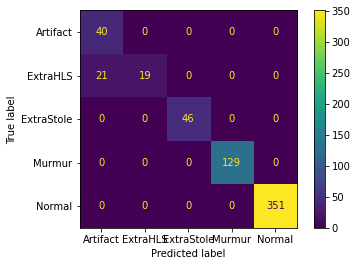

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from os.path import exists
import json

abn_knn_params_file = "./params/abn_knn_grided_cv.json"
abn_knn_scores = []

if not exists(abn_knn_params_file):
    # instantiating classifier
    abn_knn_clf = KNeighborsClassifier()
    # defining testing params
    abn_knn_param = dict(n_neighbors=list(range(1, 31)))
    # training on each param combination
    abn_knn_grided_cv = GridSearchCV(abn_knn_clf, abn_knn_param, cv=10, verbose=10, n_jobs=-1)
    # fitting to best params
    abn_knn_grided_cv.fit(abn_X, abn_y)

    with open("./params/abn_knn_grided_cv.json", "w") as param_f:
        json.dump(abn_knn_grided_cv.best_params_, param_f, indent=4)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)
else:
    with open(abn_knn_params_file, "r") as param_f:
        # instantiating classifier
        abn_knn_clf = KNeighborsClassifier(**json.load(param_f))
        abn_knn_grided_cv = abn_knn_clf.fit(abn_X, abn_y)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)


### KNN com DTW

#### X and y

In [24]:
abn_X = df_abnormalheart.drop(columns=['target'])
abn_y = df_abnormalheart['target']

abn_X.head()


,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att3044,att3045,att3046,att3047,att3048,att3049,att3050,att3051,att3052,att3053
0,0.000031,-0.000092,-0.000031,-0.000214,-0.000275,-0.000061,-0.000183,-0.000153,-0.000092,0.000122,...,0.000000,-0.000061,-0.000061,-0.000061,-0.000153,0.000000,0.000122,-0.000031,0.000000,0.000000
1,-0.000061,0.000092,-0.000122,0.000122,-0.000092,0.000061,-0.000031,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000031,0.000031,0.000000,-0.000031,0.000061,-0.000092,0.000122
2,0.000183,-0.000122,-0.000275,-0.000031,-0.000122,0.000031,-0.000153,0.000061,0.000122,0.000092,...,-0.000702,-0.000549,-0.000549,-0.000183,-0.000092,0.000092,-0.000061,-0.000031,-0.000031,0.000000
3,-0.002594,-0.006042,-0.006531,-0.005280,-0.005402,-0.006287,-0.007812,-0.008362,-0.005219,-0.001007,...,0.002228,0.004944,0.007477,0.007233,0.005005,0.009033,0.012970,0.016846,0.020752,0.019806
4,0.001617,-0.001068,0.001434,0.005188,0.010376,0.013306,0.016327,0.019501,0.019745,0.017365,...,-0.005829,-0.003967,-0.005035,-0.004791,-0.006104,-0.009064,-0.009796,-0.011322,-0.012634,-0.010834


#### Pre-processing

##### Normalizing

In [25]:
abn_X = (abn_X - abn_X.mean()) / abn_X.std()

abn_X = abn_X.dropna(axis='columns')


[0.39344262 0.36065574 0.40983607 0.3442623  0.37704918 0.45901639
 0.28333333 0.25       0.41666667 0.33333333]


/home/jarvis/repositories/MinerandoDados/mineracao-venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


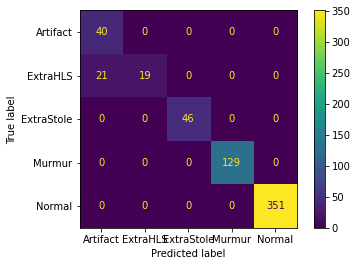

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from dtaidistance import dtw
from os.path import exists
import json

abn_knn_params_file = "./params/abn_knn_grided_cv.json"
abn_knn_scores = []

def dtw_distance(a, b):
    return dtw.distance(a, b, window=20, use_pruning='True')

if not exists(abn_knn_params_file):
    # instantiating classifier
    abn_knn_clf = KNeighborsClassifier(metric='pyfunc', func=dtw_distance)
    # defining testing params
    abn_knn_param = dict(n_neighbors=list(range(1, 31)))
    # training on each param combination
    abn_knn_grided_cv = GridSearchCV(abn_knn_clf, abn_knn_param, cv=10, verbose=10, n_jobs=-1)
    # fitting to best params
    abn_knn_grided_cv.fit(abn_X, abn_y)

    with open("./params/abn_knn_grided_cv.json", "w") as param_f:
        json.dump(abn_knn_grided_cv.best_params_, param_f, indent=4)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)
else:
    with open(abn_knn_params_file, "r") as param_f:
        # instantiating classifier
        abn_knn_clf = KNeighborsClassifier(**json.load(param_f))
        abn_knn_grided_cv = abn_knn_clf.fit(abn_X, abn_y)

        abn_knn_scores = cross_val_score(abn_knn_grided_cv, abn_X, abn_y, cv=10)
        print(abn_knn_scores)
        plot_confusion_matrix(abn_knn_grided_cv, abn_X, abn_y)


### Usando Outra Estrategia